# SVM in Python

## Data pre-process

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Import the Iris data set
from sklearn import datasets
iris = datasets.load_iris()

# divide this data into features and labels
X = iris.data
y = iris.target

print("X is of type: {}".format(type(X)))
print("y is of type: {}".format(type(y)))

# How does our data look
#print first 5 rows of X
print("First 5 rows of our data: {}".format(X[:5,:]))

#print the unique labels in y
print("unique labels: {}".format(np.unique(y)))
X = X[:,:2] # Use only the first 2 columns. This is for easy plotting/visualisation

#print first 5 rows of X
print("First 5 rows of our data: {}".format(X[:5,:]))
from sklearn.model_selection import train_test_split

#Split the data into 80% Training and 20% Testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

print(Xtrain.shape)
print (ytrain.shape)
print (Xtest.shape)
print (ytest.shape)

Xtrain[:5,:] # first 5 rows of training data


X is of type: <class 'numpy.ndarray'>
y is of type: <class 'numpy.ndarray'>
First 5 rows of our data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
unique labels: [0 1 2]
First 5 rows of our data: [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
(120, 2)
(120,)
(30, 2)
(30,)


array([[4.6, 3.6],
       [5.7, 4.4],
       [6.7, 3.1],
       [4.8, 3.4],
       [4.4, 3.2]])

## SVM model with  Linear kernel  and boundary graph

SVM Training Accuracy: 0.8

<class 'numpy.ndarray'>
(72, 2)



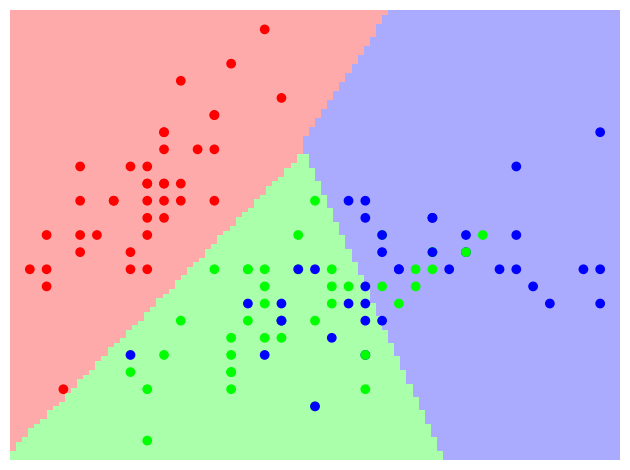

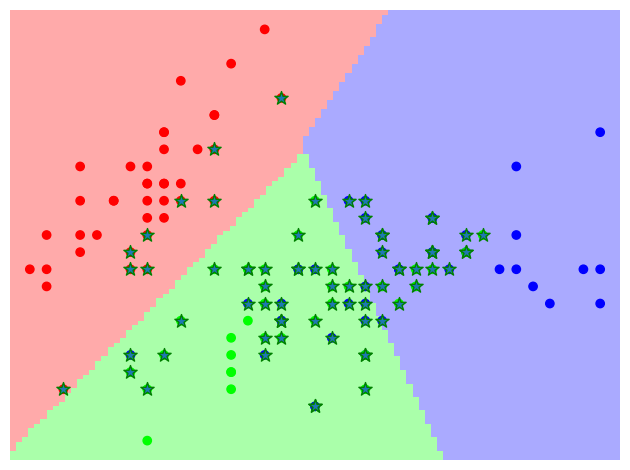

Data has a total of 72 support vectors

SVM Testing Accuracy: 0.9


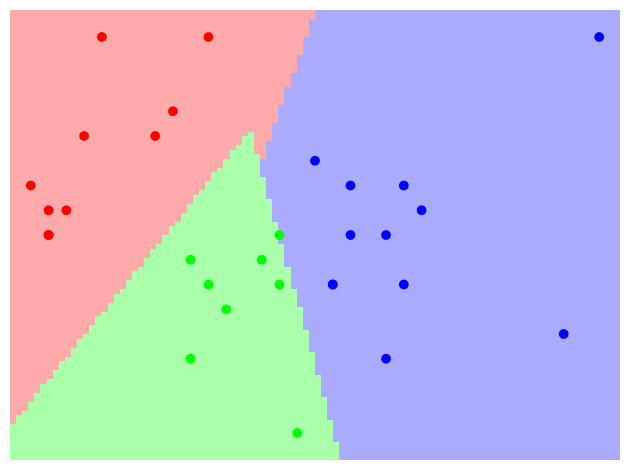

In [ ]:
from matplotlib.colors import ListedColormap

# We define a colormap with three colors, for three labels our data
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    '''
    This function takes a model (estimator),
    '''
    print()
    estimator.fit(X, y)
    # Determine the maximum and minimum mesh as a boundary
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    # Generating the points on the mesh
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100))
    # Make predictions on the grid points
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # for color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Original training sample
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

from sklearn import svm
from sklearn import metrics

# Fit an SVM using linear kernel
svm_model = svm.SVC(kernel='linear')
svm_model.fit(Xtrain, ytrain)

#Training/Testing Accuracy:
svm_acc = metrics.accuracy_score(ytrain, svm_model.predict(Xtrain))
print("SVM Training Accuracy: {}".format(svm_acc))
plot_estimator(svm_model,Xtrain,ytrain)
print(type(svm_model.support_vectors_))
print(svm_model.support_vectors_.shape)


# Plotting support vectors
plot_estimator(svm_model,Xtrain,ytrain)
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, edgecolors='g', marker='*', zorder=10)
plt.show()
print("Data has a total of {} support vectors".format(svm_model.support_vectors_.shape[0]))
#Testing Accuracy:
svm_acc_test = metrics.accuracy_score(ytest, svm_model.predict(Xtest))
plot_estimator(svm_model,Xtest, svm_model.predict(Xtest))
print("SVM Testing Accuracy: {}".format(svm_acc_test))

# Linear SVM with two class problem

## data pre-process

(80, 2)
(80,)
(20, 2)
(20,)
SVM Training Accuracy: 0.7125




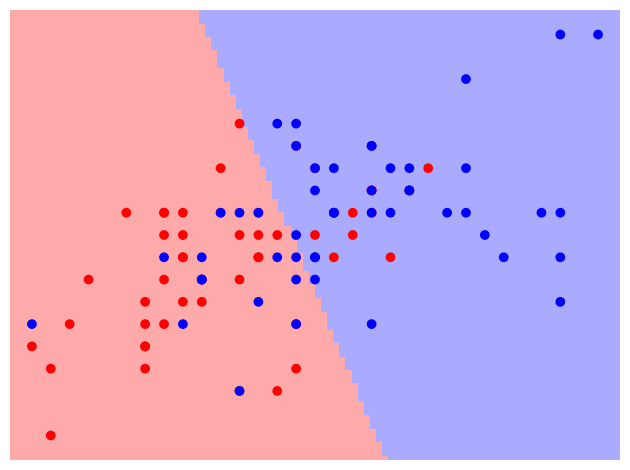

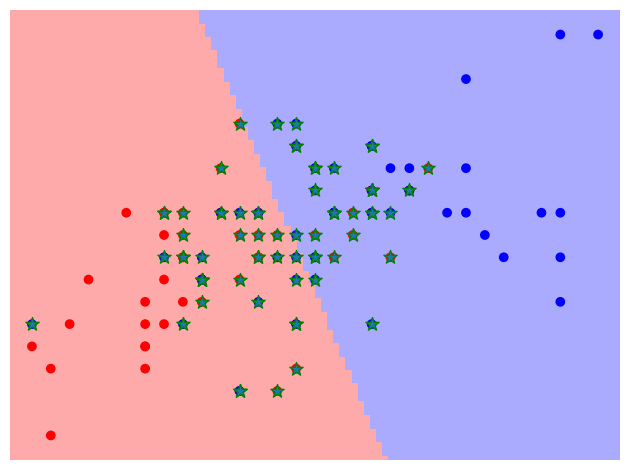

SVM Testing Accuracy: 0.7


In [ ]:
X, y = X[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]

#Split the data into 80% Training and 20% Testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)
# Fit SVM using linear kernel on training data
svc_model = svm.SVC(kernel='linear')
svc_model.fit(Xtrain, ytrain)

#Training/Testing Accuracy:
svc_acc = metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))
print("SVM Training Accuracy: {}".format(svc_acc))
plot_estimator(svc_model,X,y)
# Plotting support vectors
plot_estimator(svc_model,X,y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='*', edgecolors='g', zorder=10)
plt.show()
#Testing Accuracy:
svc_acc_test = metrics.accuracy_score(ytest, svc_model.predict(Xtest))
print("SVM Testing Accuracy: {}".format(svc_acc_test))

## Linear SVM with C value


Data has a total of 55 support vectors
Training accuracy: 0.725
Testing accuracy : 0.7



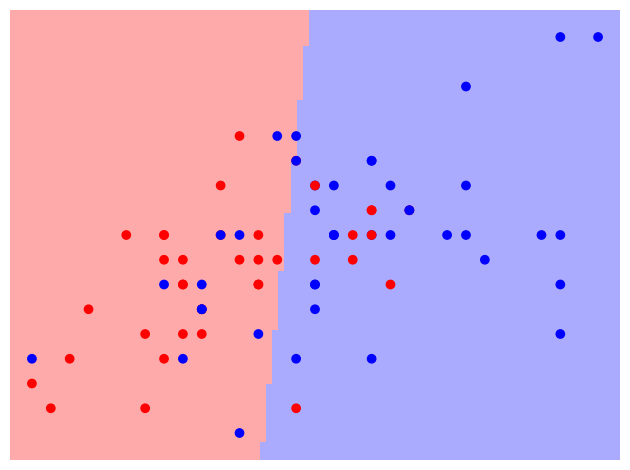

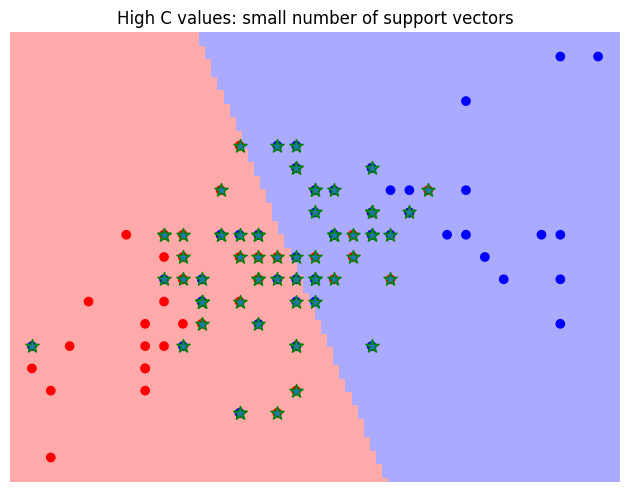

In [ ]:
svc_model = svm.SVC(kernel='linear', C=1e2)
svc_model.fit(Xtrain, ytrain)
plot_estimator(svc_model, Xtrain, ytrain)
print("Data has a total of {} support vectors".format(svc_model.support_vectors_.shape[0]))

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))
# Plotting support vectors
plot_estimator(svc_model,X,y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='*', edgecolors='g', zorder=10)
plt.title('High C values: small number of support vectors')
plt.show()

## Linear SVM with small C value

Data has a total of 76 support vectors

Training accuracy: 0.7
Testing accuracy : 0.65



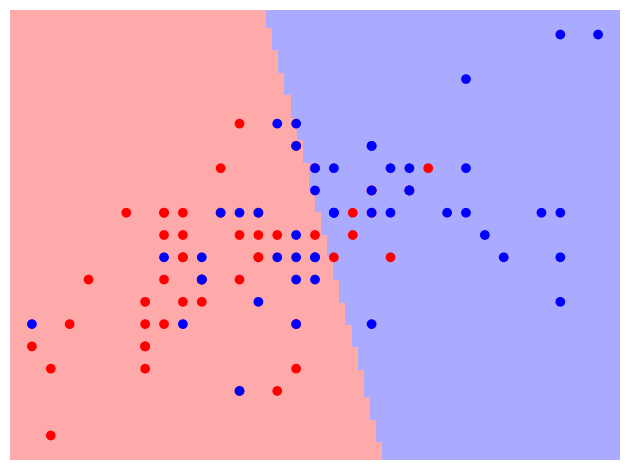

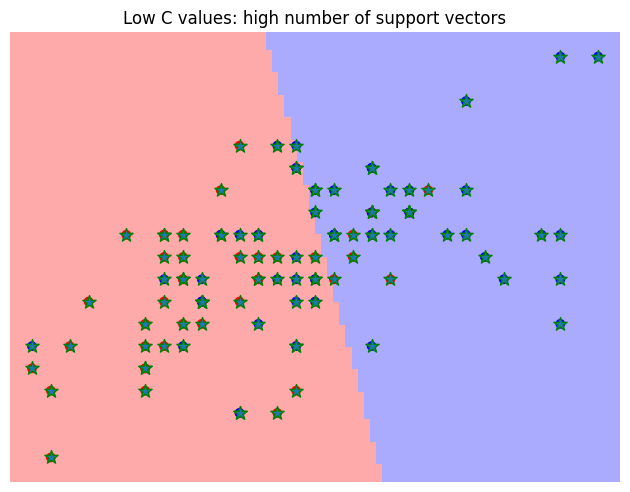

In [ ]:
svc_model = svm.SVC(kernel='linear', C=1e-2)

svc_model.fit(Xtrain, ytrain)
print("Data has a total of {} support vectors".format(svc_model.support_vectors_.shape[0]))

plot_estimator(svc_model, X, y)

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))
# Plotting support vectors
plot_estimator(svc_model,X,y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='*', edgecolors='g', zorder=10)
plt.title('Low C values: high number of support vectors')
plt.show()

## Linear SVM with LinearSVC function

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


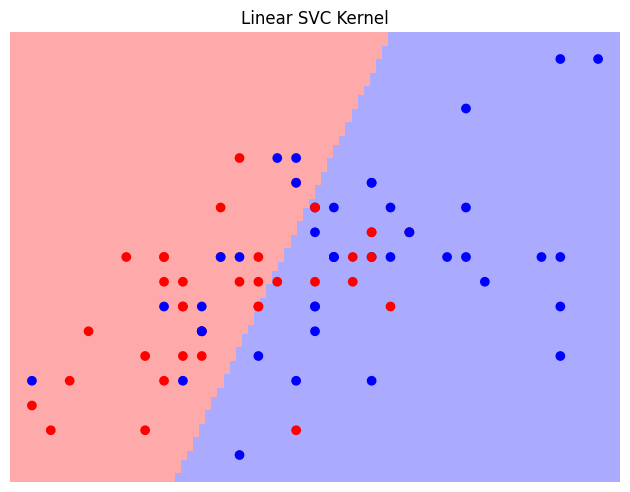

In [ ]:
svc_model = svm.LinearSVC()
plot_estimator(svc_model, Xtrain, ytrain)
plt.title('Linear SVC Kernel')
plt.show()

## SVM with Polynomial kernel


Training accuracy: 0.725
Testing accuracy : 0.7



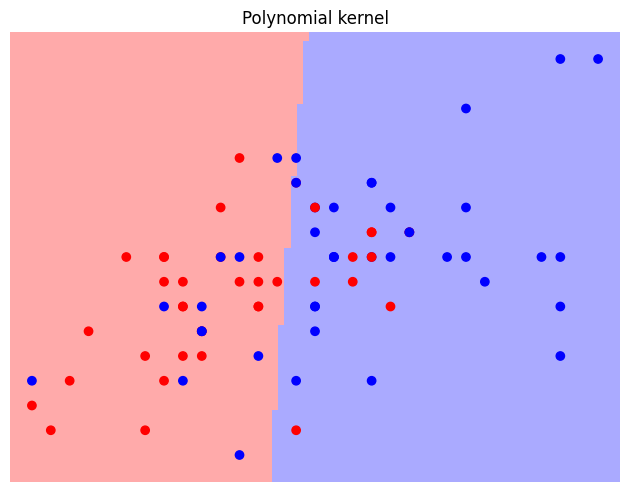

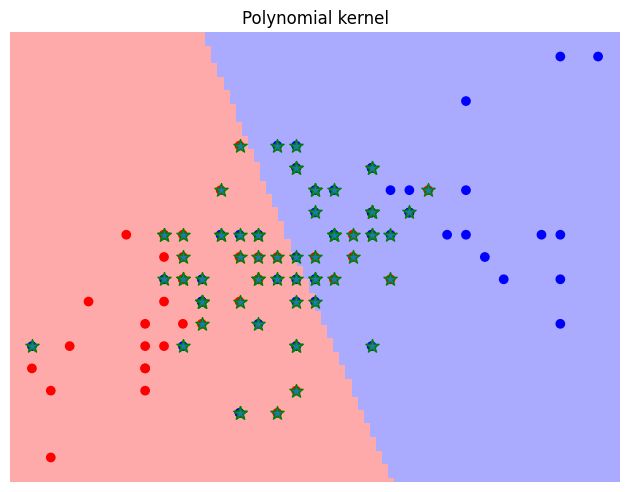

In [ ]:
svc_model = svm.SVC(kernel='poly', degree=2)

svc_model.fit(Xtrain,ytrain)
plot_estimator(svc_model, Xtrain, ytrain)
plt.title('Polynomial kernel')

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))
#plotting support vectors
plot_estimator(svc_model, X, y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], marker='*', s=100, edgecolors='g', zorder=10)
plt.title('Polynomial kernel')
plt.show()

# The RBF kernel


Training accuracy: 0.8875
Testing accuracy : 0.85



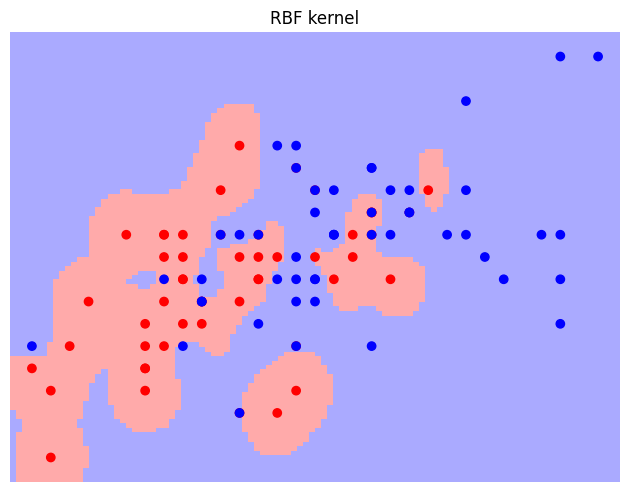

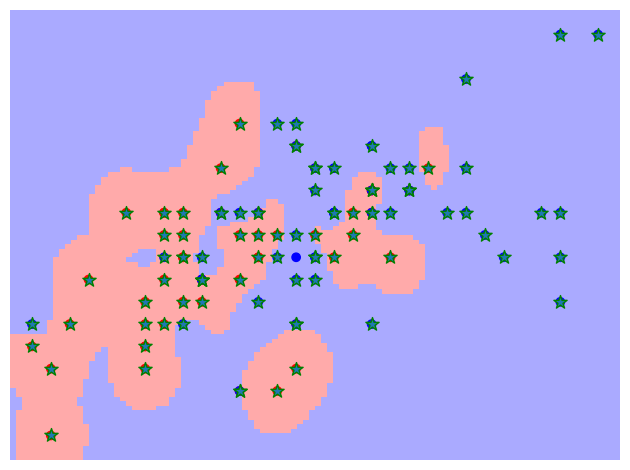

In [ ]:
svc_model = svm.SVC(kernel='rbf', gamma=1e2)

svc_model.fit(X,y)
plot_estimator(svc_model, X, y)
plt.title('RBF kernel')
#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))
#plotting support vectors
plot_estimator(svc_model, X, y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='*', edgecolors='g', zorder=10)
plt.show()